#                                                Project-2 Customer Segmentation Analysis

In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\os\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [36]:
# Load the dataset
marketing_data_filePath="Csv file/ifood_df.csv"
marketing_data=pd.read_csv(marketing_data_filePath)

# Display first few rows
marketing_data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [37]:
# Explore the dataset
print("Shape:",marketing_data.shape)
marketing_data.info()
marketing_data.describe()

Shape: (2205, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Acc

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [38]:
# Data Cleaning
marketing_data.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [39]:
# checking data values is unique or not
marketing_data.nunique()

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [40]:
# Remove duplicates
marketing_data.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

In [41]:
# Double-check Total Spending
spend_cols = [
    'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
    'MntSweetProducts','MntGoldProds'
]

marketing_data['TotalSpend'] = marketing_data[spend_cols].sum(axis=1)

In [42]:
#Select Features For Segmentation
base_features = [
    'Income','Kidhome','Teenhome','Recency',
    'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
    'MntSweetProducts','MntGoldProds','MntTotal','TotalSpend'
]

dummy_features = [col for col in marketing_data.columns if 'marital_' in col or 'education_' in col]

X = marketing_data[base_features + dummy_features]

In [43]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

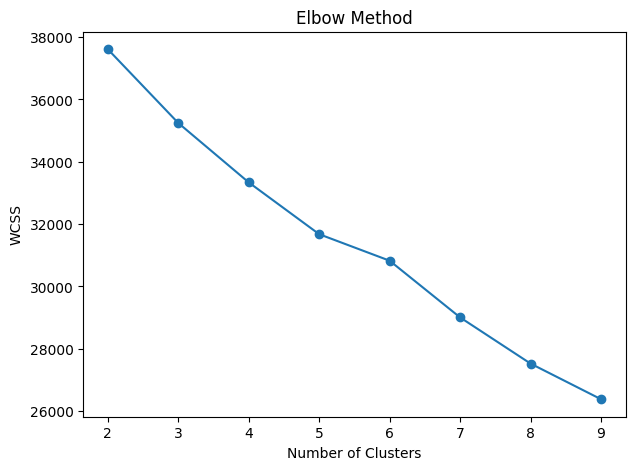

In [44]:
# Find Best Number of Clusters (Elbow Method)
wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [46]:
# Silhouette Score 
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print("Clusters:", k, "Silhouette Score:", score)

Clusters: 2 Silhouette Score: 0.2263830157829516
Clusters: 3 Silhouette Score: 0.11660487551532583
Clusters: 4 Silhouette Score: 0.125564669974843
Clusters: 5 Silhouette Score: 0.10863403693302785
Clusters: 6 Silhouette Score: 0.1084686632626256
Clusters: 7 Silhouette Score: 0.1257564138374045
Clusters: 8 Silhouette Score: 0.12546465289393363
Clusters: 9 Silhouette Score: 0.14170457966277755


In [48]:
# Apply K-Means (Assume k = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
marketing_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [50]:
# Cluster Summary
cluster_summary = marketing_data.groupby('Cluster').agg({
    'Income':'mean',
    'Kidhome':'mean',
    'Teenhome':'mean',
    'Recency':'mean',
    'TotalSpend':'mean'
}).round(2)

cluster_summary

,Income,Kidhome,Teenhome,Recency,TotalSpend
Cluster,,,,,
0,75477.19,0.07,0.23,49.86,1410.71
1,57276.84,0.13,0.92,48.05,633.39
2,33590.55,0.88,0.40,49.13,106.30
3,56481.55,0.24,0.64,48.80,727.96


Visualization

C:\Users\os\AppData\Local\Temp\ipykernel_2052\1202520357.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=marketing_data, x='Cluster', palette='Set2')


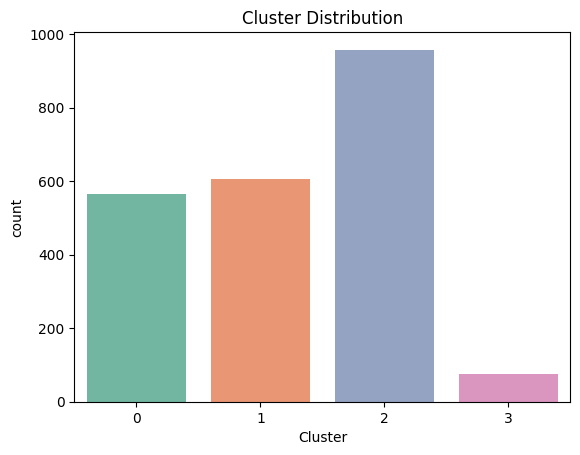

In [51]:
# Cluster Distribution
sns.countplot(data=marketing_data, x='Cluster', palette='Set2')
plt.title("Cluster Distribution")
plt.show()

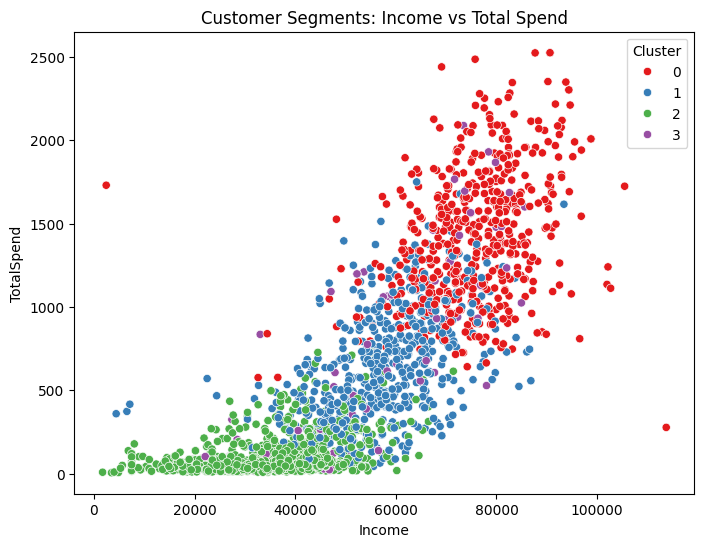

In [52]:
# Income vs Total Spend
plt.figure(figsize=(8,6))
sns.scatterplot(data=marketing_data, x='Income', y='TotalSpend', hue='Cluster', palette='Set1')
plt.title("Customer Segments: Income vs Total Spend")
plt.show()

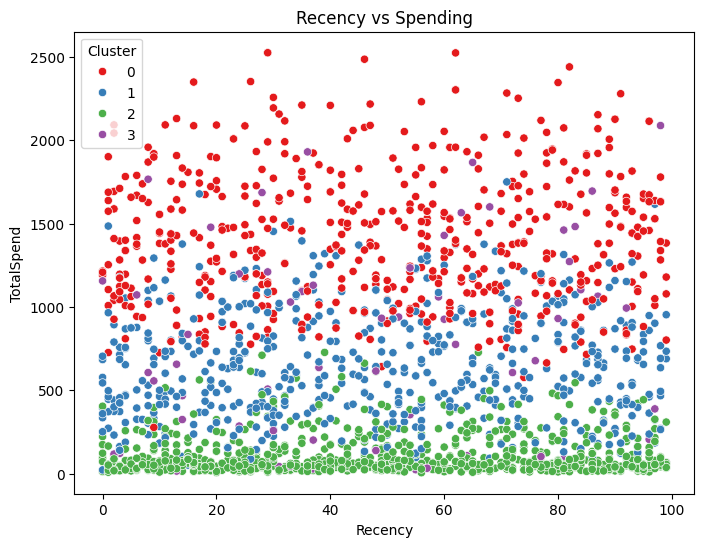

In [55]:
# Recency vs TotalSpend
plt.figure(figsize=(8,6))
sns.scatterplot(data=marketing_data, x='Recency', y='TotalSpend', hue='Cluster', palette='Set1')
plt.title("Recency vs Spending")
plt.show()

# Insights & Recommendations 
1) For Cluster 0 – VIP Premium Customers:
  a) Promote exclusive products, rewards, early access.
  b) High-margin items and premium categories.

2) For Cluster 1 – Family with Teens:
  a) Offer family bundles, festive packs, loyalty bonuses.

3) For Cluster 2 – Budget Customers:
  a) Focus on discounts, free shipping, combo offers.
  b) Promote essential and low-cost items.

4) For Cluster 3 – Mid-Spenders:
  a) Personalized recommendations.
  b) Upsell higher-value items through targeted emails.